In [2]:
# %load feat_extract.py
import pandas as pd

train = pd.read_csv('D:/Datasets/MOOC数据集/KDD2015/prediction_log/train_log.csv')
test = pd.read_csv('D:/Datasets/MOOC数据集/KDD2015/prediction_log/test_log.csv')

In [3]:
%matplotlib inline 
import pandas as pd # pandas 本体库， 使得调用时仅写 pd 即可
import numpy as np #数据处理库， 配合 numpy 使用效果更佳
import matplotlib.pyplot as plt #专用画图的库
import seaborn #另一个基于 matplot 的数据可视化库， 为数据可视化作准备

In [4]:
train.head()

,enroll_id,username,course_id,session_id,action,object,time
0,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,NaN,2015-09-27T15:42:59
1,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,NaN,2015-09-27T15:43:12
2,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:37:42
3,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:27
4,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:30


In [5]:
train.shape

(29165540, 7)

In [6]:
train_truth = pd.read_csv('D:/Datasets/MOOC数据集/KDD2015/prediction_log/train_truth.csv', index_col='enroll_id')
test_truth = pd.read_csv('D:/Datasets/MOOC数据集/KDD2015/prediction_log/test_truth.csv', index_col='enroll_id')

In [7]:
train_truth.head()

,truth
enroll_id,
772,1
773,1
774,1
776,0
777,1


In [8]:
train_truth.apply(pd.Series.value_counts)

,truth
1,119817
0,38126


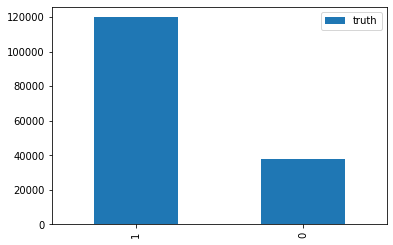

In [9]:
train_truth.apply(pd.Series.value_counts).plot(kind='bar')  # 约4:1

In [10]:
train_truth.shape

(157943, 1)

In [11]:
all_truth = pd.concat([train_truth, test_truth])
all_truth.shape #共225642个enroll_id

(225642, 1)

In [12]:
all_log = pd.concat([train, test])
all_log.shape

(42110402, 7)

In [13]:
all_log.apply(lambda x: sum(x.isnull()))  #统计字段中数据为Nan的数量

enroll_id            0
username             0
course_id            0
session_id           0
action               0
object        11010003
time                 0
dtype: int64

In [14]:
train_enroll = list(set(list(train['enroll_id'])))
#把train_log.csv数据集中的enroll_id字段下数据组成一个list，去除重复值(set方法)后再组成一个list

test_enroll = list(set(list(test['enroll_id'])))

In [15]:
len(train_enroll)

157943

In [16]:
len(test_enroll)

67699

In [17]:
video_action = ['seek_video','play_video','pause_video','stop_video','load_video']
problem_action = ['problem_get','problem_check','problem_save','reset_problem','problem_check_correct', 'problem_check_incorrect']
forum_action = ['create_thread','create_comment','delete_thread','delete_comment']
click_action = ['click_info','click_courseware','click_about','click_forum','click_progress']
close_action = ['close_courseware']

In [18]:
all_num = all_log.groupby('enroll_id').count()[['action']]  #根据enroll_id对action字段计数
all_num.columns = ['all#count']  #计数结果存入all#count的新字段中
all_num.head()

,all#count
enroll_id,
772,2
773,21
774,74
775,39
776,19


In [19]:
len(all_num)

225642

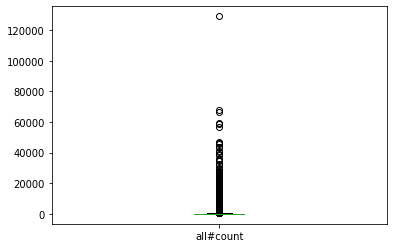

In [20]:
all_num['all#count'].plot(kind='box',return_type='axes')
#all_num['all#count'].plot(kind='bar')

In [21]:
session_enroll = all_log[['session_id']].drop_duplicates()  #去除重复项
session_enroll

,session_id
0,d8a9b787fa69063c34c73b9c29190b1c
2,2f02b86eb3ea2cbf0be11385a8dc62e5
23,26449d5b9c0dfd76bdf981410ef33d94
24,fd2ad174b4aa8f6dd3e8900e1ba62735
56,138155092c1a9ce258b0da27a169b14d
...,...
12944661,5b4c1299adc143ddf8b8960c298d1977
12944666,f1e0abdf5d0376ad4d3ccc761c9dbf75
12944757,dff26b0eb328718eee09b05fc79b35ad
12944762,dde2457a57ecb4473323252e8644a4da


In [22]:
session_num = all_log.groupby('enroll_id').count()
session_num

,username,course_id,session_id,action,object,time
enroll_id,,,,,,
772,2,2,2,2,0,2
773,21,21,21,21,14,21
774,74,74,74,74,42,74
775,39,39,39,39,30,39
776,19,19,19,19,9,19
...,...,...,...,...,...,...
466781,29,29,29,29,29,29
466782,24,24,24,24,6,24
466783,2,2,2,2,0,2


In [23]:
all_num['session#count'] = session_num['session_id']
all_num.head()

,all#count,session#count
enroll_id,,
772,2,2
773,21,21
774,74,74
775,39,39
776,19,19


In [24]:
video_action + problem_action + forum_action + click_action + close_action

['seek_video',
 'play_video',
 'pause_video',
 'stop_video',
 'load_video',
 'problem_get',
 'problem_check',
 'problem_save',
 'reset_problem',
 'problem_check_correct',
 'problem_check_incorrect',
 'create_thread',
 'create_comment',
 'delete_thread',
 'delete_comment',
 'click_info',
 'click_courseware',
 'click_about',
 'click_forum',
 'click_progress',
 'close_courseware']

In [25]:
(all_log['action'] == 'seek_video').astype(int)

0           0
1           0
2           0
3           0
4           0
           ..
12944857    0
12944858    0
12944859    0
12944860    0
12944861    0
Name: action, Length: 42110402, dtype: int32

In [26]:
len(all_log['action'])

42110402

In [27]:
(all_log['action'] == 'play_video').astype(int)

0           0
1           0
2           0
3           0
4           1
           ..
12944857    0
12944858    0
12944859    0
12944860    0
12944861    0
Name: action, Length: 42110402, dtype: int32

In [33]:
for a in video_action + problem_action + forum_action + click_action + close_action:
    action_ = (all_log['action'] == a).astype(int)  #astype：转换数组的数据类型, 结果为0或1
    all_log[a+'#num'] = action_      #对应行为如 seek_video#num 为0或1
    action_num = all_log.groupby('enroll_id').sum()[[[a+'#num']]]  #按enroll_id对对应的行为数如seek_video#num 求和
    all_num = pd.merge(all_num, action_num, left_index=True, right_index=True)

MemoryError: 

In [ ]:
all_num  #将225642个enroll_id的对应行为数统计求和

In [ ]:
all_num = pd.merge(all_num, all_truth, left_index=True, right_index=True)   #将标签列融合
enroll_info = all_log[['username','course_id','enroll_id']].drop_duplicates()
enroll_info.index = enroll_info['enroll_id']
del enroll_info['enroll_id']
all_num = pd.merge(all_num, enroll_info, left_index=True, right_index=True)
all_num.loc[test_enroll].to_csv('test_features.csv')
all_num.loc[train_enroll].to_csv('train_features.csv')